<a href="https://colab.research.google.com/github/felipemoreia/acelaradev-codenation/blob/master/feature_engenearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [0]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [0]:
countries = pd.read_csv("countries.csv")

In [0]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [0]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [0]:
numericas =  ["Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"]

In [0]:
nao_numericas = ["Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"]

for x in nao_numericas:
    countries[x] = countries[x].str.replace(',','.')
    countries[x] = countries[x].astype('float64')

In [0]:
nominais = ["Country", "Region"]

for x in nominais:
    countries[x] = countries[x].str.strip()

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [0]:
def q1():
    lista_regioes = list(countries['Region'].unique())
    lista_regioes = sorted(lista_regioes)
    return lista_regioes

In [0]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [0]:
from sklearn.preprocessing import KBinsDiscretizer

In [0]:
def q2():
    target = countries['Pop_density'].reset_index() 
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    target_discretizado = discretizer.fit_transform(target)
    target = pd.DataFrame(target_discretizado)
    lista_final = list(target[target[0]==9].count())
    return int(lista_final[0])

In [0]:
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [0]:
num_regions = int(countries['Region'].nunique())
num_climate = int(countries['Climate'].nunique(dropna=False))
num_novas_variaveis = num_regions + num_climate

In [0]:
def q3():
    num_regions = int(countries['Region'].nunique())
    num_climate = int(countries['Climate'].nunique())
    num_novas_variaveis = num_regions + num_climate
    return num_novas_variaveis

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [0]:
countries.isna().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [0]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [0]:
def q4():
    pipeline = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(missing_values =np.nan, strategy = "median")),
    ('standardscaler', StandardScaler())
    ])
    x = countries.drop(nominais, axis=1)
    pipeline.fit_transform(x)
    df_test_country = pd.DataFrame([test_country], columns=new_column_names)
    x_test = df_test_country.drop(nominais, axis=1)
    x_test_transformed = pipeline.transform(x_test)
    x_test_final = pd.DataFrame(x_test_transformed, columns=numericas)
    answer = round(float(x_test_final['Arable'][0]),3)
    return answer

In [0]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

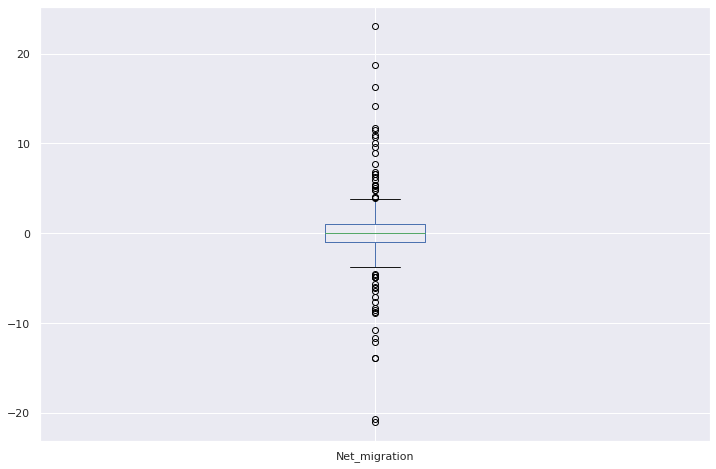

In [0]:
countries['Net_migration'].plot(kind='box')    

In [0]:
decision = False


In [0]:
quartile1 = countries['Net_migration'].quantile(0.25)
quartile3 = countries['Net_migration'].quantile(0.75)
iqr = quartile3 - quartile1

In [0]:
boxploteq = (quartile1 - 1.5*iqr, quartile3 + 1.5*iqr)
boxploteq

(-3.8149999999999995, 3.885)

In [0]:
outliers_1 = len(countries[countries['Net_migration']<boxploteq[0]])
outliers_2 = len(countries[countries['Net_migration']>boxploteq[1]])


In [0]:
print(len(countries['Net_migration']),'É o número total de observações')
print(outliers_1, 'É o número de outliers inferiores ao intervalo do boxplot')
print(outliers_2, 'É o número de outliers superiores ao intervalo do boxplot')

227 É o número total de observações
24 É o número de outliers inferiores ao intervalo do boxplot
26 É o número de outliers superiores ao intervalo do boxplot


In [0]:
def q5():
    decision = False
    return (outliers_1, outliers_2, decision)


## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [0]:
CV = CountVectorizer()
df_vectorized = CV.fit_transform(newsgroup.data)

In [0]:
indice = CV.vocabulary_.get("phone")
phone = df_vectorized[:,indice]

In [0]:
phone_counts = int(phone.sum())

In [0]:
def q6():
    return phone_counts

In [0]:
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [0]:
tfidf_vec = TfidfVectorizer()
vectorized_data = tfidf_vec.fit_transform(newsgroup.data)

In [0]:
phone_count_2 = vectorized_data[:, indice]
phone_count_2[phone_count_2 != 0]
phone_count_2.sum()

8.88774594667355

In [0]:
def q7():
    return float(round(phone_count_2.sum(),3))


In [0]:
q7()

8.888